## Exploratory Data Analysis (EDA) - Análise de Crédito para Fintech
  - Etapa direcionada para estudo do público com dados de Application:

  Em crédito, o termo "application" geralmente se refere ao processo de solicitação de crédito por parte de um indivíduo ou empresa a uma instituição financeira. É o momento em que o cliente potencial envia sua requisição para obter um empréstimo, financiamento ou qualquer outra forma de crédito. Durante essa aplicação, são fornecidas informações pessoais, financeiras e detalhes sobre a finalidade do crédito solicitado. A instituição financeira então avalia essas informações para decidir se concede ou não o crédito e em quais condições.

### 🎯 Objetivo do Projeto
Projeto de análise de crédito de uma Fintech em crescimento, que terá como ênfase desenvolver uma solução analítica baseada em Ciência de Dados para identificar padrões de inadimplência e prever o risco de crédito de uma concessão de crédito a novos clientes.

A iniciativa visa também apoiar instituições financeiras e órgãos públicos na tomada de decisão mais assertiva, promovendo estratégias de concessão responsável de crédito e redução da inadimplência, especialmente diante do cenário atual, em que 75,7 milhões de brasileiros (46,6% da população adulta) estavam inadimplentes em  2025 um aumento de 2,8 milhões em relação ao ano anterior.






## Visualização:
Respondendo as perguntas de negócio:

Qual a quantidade clientes?

Qual o percentual de clientes adimplentes e inadimplentes?

Qual a idade dos clientes?

Qual a ocupação dos clientes?

Qual o nível escolar?

Qual valor de empréstimos?

# Bibliotecas:

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
#Mapear nosso Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
application = pd.read_csv('/content/gdrive/MyDrive/PoD Academy/2. Modulo Tecnologia e Programação/Projeto - EDA - Credito Application/application_train.csv')

In [5]:
application.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#. Compreendendo os dados:
print('Informações sobre o DataSet: \n')
print(application.info())

print('\nEstatistícas descritivas: \n')
print(application.describe())

print('Tipos de dados e valores ausentes: \n')
print(application.isnull().sum())

print('\nNúmero de valores duplicados: \n')
print(application.duplicated().sum())

Informações sobre o DataSet: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None

Estatistícas descritivas: 

          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  30

In [7]:
application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [8]:
#Compreensão dos dados
application.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


In [39]:
# Quantidade de Clientes:
quantidade_emprestimos = application['AMT_CREDIT'].count()

print((f'Volume do Publico: {quantidade_emprestimos}'))

Volume do Publico: 307511


In [40]:
# Qual a quantidade de clientes adimplentes e inadimplentes?
application['TARGET'].value_counts().rename({0: 'Adimplentes', 1: 'Inadimplentes'}).rename_axis('Status')

,count
Status,
Adimplentes,282686
Inadimplentes,24825


## Dados do Cenário Atual da Carteira:

In [9]:
#Distribuição por Tipo de Renda
tipo_renda = application.groupby('NAME_INCOME_TYPE').count()['AMT_INCOME_TOTAL'].reset_index(name='Quantidade')
tipo_renda = tipo_renda.sort_values(by='Quantidade', ascending=False)
print(tipo_renda)

       NAME_INCOME_TYPE  Quantidade
7               Working      158774
1  Commercial associate       71617
3             Pensioner       55362
4         State servant       21703
6            Unemployed          22
5               Student          18
0           Businessman          10
2       Maternity leave           5


In [10]:
# Gráfico de barras horizontais
fig = px.bar(
    tipo_renda,
    x='Quantidade',
    y='NAME_INCOME_TYPE',
    orientation='h',
    title='Distribuição por Tipo de Renda',
    labels={'NAME_INCOME_TYPE': 'Tipo de Renda', 'Quantidade': 'Quantidade'},
    text='Quantidade',
    color='NAME_INCOME_TYPE',
    width=600,
    height=500
)
# Mostra o gráfico
fig.show()

In [32]:
#Distribuição por Nivel de Educação:
#Contagem Education_type:
educacao = application.groupby('NAME_EDUCATION_TYPE').count()['TARGET'].reset_index(name='Quantidade')
print(educacao)

             NAME_EDUCATION_TYPE  Quantidade
0                Academic degree         164
1               Higher education       74863
2              Incomplete higher       10277
3                Lower secondary        3816
4  Secondary / secondary special      218391


In [33]:
#Grafico educacao:
fig = px.pie(educacao, values='Quantidade', names='NAME_EDUCATION_TYPE', title='Distribuição por Educação')

fig.update_layout(width=600, height=500)

# Mostra o gráfico
fig.show()

In [34]:
#Tipo de Renda
# Criação do gráfico de pizza
fig = px.pie(tipo_renda, values='Quantidade', names='NAME_INCOME_TYPE', title='Percentual por Tipo de Renda')

fig.update_layout(width=600, height=500)

# Mostra o gráfico
fig.show()

In [35]:
#Transformação variáveul Idade:
idade = application['DAYS_BIRTH'] / -365

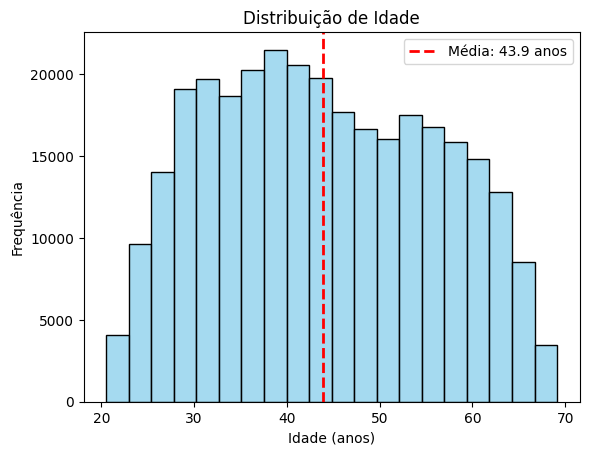

In [36]:
# Plotar o histograma da idade
sns.histplot(idade, bins=20, color='skyblue')

# Calcular a média
media_idade = idade.mean()

# Inserir a linha da média
plt.axvline(media_idade, color='red', linestyle='dashed', linewidth=2, label=f'Média: {media_idade:.1f} anos')

# Adicionar título e rótulos
plt.title('Distribuição de Idade')
plt.xlabel('Idade (anos)')
plt.ylabel('Frequência')
plt.legend()
plt.show()

In [37]:
#Estado Civil
estado_civil = application.groupby('NAME_FAMILY_STATUS').count()['AMT_INCOME_TOTAL'].reset_index(name='Quantidade')
print(estado_civil)

     NAME_FAMILY_STATUS  Quantidade
0        Civil marriage       29775
1               Married      196432
2             Separated       19770
3  Single / not married       45444
4               Unknown           2
5                 Widow       16088


In [38]:
# Se você já tem os dados assim:
estado_civil = application.groupby('NAME_FAMILY_STATUS').count()['AMT_INCOME_TOTAL'].reset_index(name='Quantidade')

# Criação do gráfico de pizza
fig = px.pie(estado_civil, values='Quantidade', names='NAME_FAMILY_STATUS', title='Distribuição por Estado Civil')

fig.update_layout(width=600, height=500)

# Mostra o gráfico
fig.show()

In [13]:
application['AMT_INCOME_TOTAL'].describe().round(0)

,AMT_INCOME_TOTAL
count,307511.0
mean,168798.0
std,237123.0
min,25650.0
25%,112500.0
50%,147150.0
75%,202500.0
max,117000000.0


In [11]:
fig = px.histogram(application, x="AMT_CREDIT", title="Distribuição de valores de crédito concedido")
# Atualizar layout com tamanho e rótulos dos eixos
fig.update_layout(
    width=600,
    height=500,
    xaxis_title="Valor de Crédito (AMT_CREDIT)",
    yaxis_title="Frequência"
)

fig.show()

In [12]:
application['AMT_CREDIT'].describe().round(1)

,AMT_CREDIT
count,307511.0
mean,599026.0
std,402490.8
min,45000.0
25%,270000.0
50%,513531.0
75%,808650.0
max,4050000.0


In [16]:
# Contagem e renomeação dos status
status = application['TARGET'].value_counts().rename({0: 'Adimplentes', 1: 'Inadimplentes'}).rename_axis('Status').reset_index(name='Quantidade')

# Gráfico com Plotly
fig = px.bar(
    status,
    x='Status',
    y='Quantidade',
    text='Quantidade',
    color='Status',
    orientation='v',
    #color_discrete_map={'Adimplentes': 'lightgreen', 'Inadimplentes': 'pink'},
    title='Clientes Adimplentes x Inadimplentes'
)

fig.update_layout(width=600, height=500)

#Ajuste largura das barras:
fig.update_traces(width=0.4)

# Posicionar os valores acima das barras
fig.update_traces(textposition='outside')

In [17]:
# Qual a percentual de clientes adimplentes e inadimplentes?
percentual_status = application['TARGET'].value_counts(normalize=True).rename({0: 'Adimplentes', 1: 'Inadimplentes'}).rename_axis('Status')
#application['TARGET'].value_counts()

In [18]:
# Criando a série de proporções com nomes legíveis
percentual_status = application['TARGET'].value_counts(normalize=True)\
    .rename({0: 'Adimplentes', 1: 'Inadimplentes'})\
    .rename_axis('Status')\
    .reset_index(name='Proporcao')

# Plotando gráfico de pizza
fig = px.pie(
    percentual_status,
    names='Status',
    values='Proporcao',
    title='Proporção de Clientes Adimplentes x Inadimplentes',
    color='Status'
    #color_discrete_map={'Adimplentes': 'lightgreen', 'Inadimplentes': 'pink'}

)

# Exibir percentuais no gráfico
fig.update_traces(textinfo='percent+label')


fig.update_layout(width=600, height=500)

# Mostrar o gráfico
fig.show()

In [19]:
produto = application.groupby('NAME_CONTRACT_TYPE').count()['AMT_CREDIT']
print(produto)

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: AMT_CREDIT, dtype: int64


In [20]:
# Agrupando e contando os contratos por tipo
produto = application.groupby('NAME_CONTRACT_TYPE').count()['AMT_INCOME_TOTAL'].reset_index(name='Quantidade')

# Exibir o gráfico de barras
fig = px.bar(
    produto,
    x='NAME_CONTRACT_TYPE',
    y='Quantidade',
    text='Quantidade',
    title='Quantidade de Contratos por Tipo',
    color='NAME_CONTRACT_TYPE'
)

# Mostrar valores acima das barras
fig.update_traces(textposition='outside')

# Layout opcional
fig.update_layout(
    xaxis_title='Tipo de Contrato',
    yaxis_title='Quantidade',
    showlegend=False,
    width=600,
    height=500
)

#Ajuste largura das barras:
fig.update_traces(width=0.4)

fig.show()

In [21]:
media_salario = application.groupby('NAME_CONTRACT_TYPE')['AMT_INCOME_TOTAL'].mean()
print(media_salario)

NAME_CONTRACT_TYPE
Cash loans         169069.513575
Revolving loans    166217.017656
Name: AMT_INCOME_TOTAL, dtype: float64


In [22]:
application.CNT_CHILDREN.value_counts()

,count
CNT_CHILDREN,
0,215371
1,61119
2,26749
3,3717
4,429
5,84
6,21
7,7
14,3


In [23]:
application.CNT_CHILDREN.describe()

,CNT_CHILDREN
count,307511.000000
mean,0.417052
std,0.722121
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,19.000000
